# Deep Learning
-----------------
## **_Convolutional Neural Network_**
In the next cell, I want to learn more about Conv layers.

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2
from torchvision import transforms

In [5]:
train_data = CIFAR10(
    root= "data",
    download= True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    )
test_data = CIFAR10(
    root= "data",
    train= False,
    download= True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    )

100%|██████████| 170498071/170498071 [00:02<00:00, 77843769.57it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [6]:
def print_iamges(samples, nrows, ncols,scale, titles = False):
    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(nrows * scale,ncols * scale))
    axes = axes.ravel()
    i = 0
    for idx,ax in enumerate(axes):
          ax.figure
          ax.imshow(samples[int(idx)], cmap="gray")
          if titles : ax.set_title(titles[int(idx/2)])



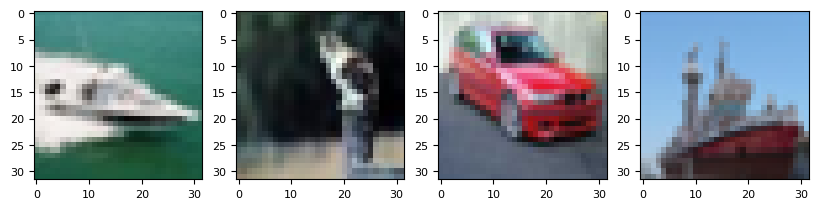

In [7]:
train_x, train_y = train_data.data, train_data.targets
samples = torch.randint(low= 0,high = 6000,size = (1,4)).tolist()[0]
len(train_x[samples])
print_iamges(train_x[samples], 1, 4,10)

In [8]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 1, out_channels=2, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x[:,0:1,:,:].float())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


torch.Size([4, 2, 32, 32]) torch.Size([4, 3, 32, 32])


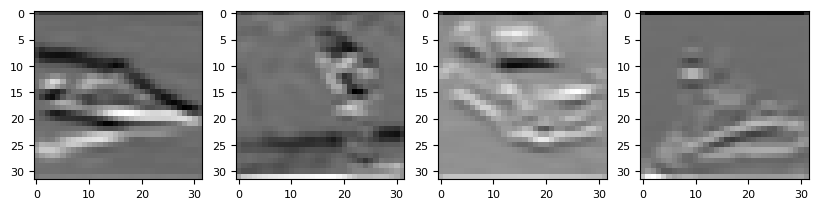

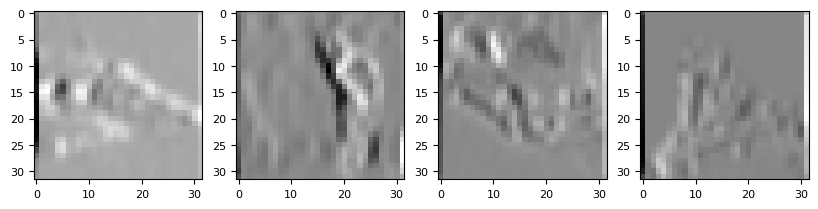

In [9]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,0]),1,4,10)
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(result.shape,x.shape)

In [10]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 1, out_channels=2, kernel_size=3, stride=2, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x[:,0:1,:,:].float())

## Stride
The last step might not be taken.

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([16, 16]) 


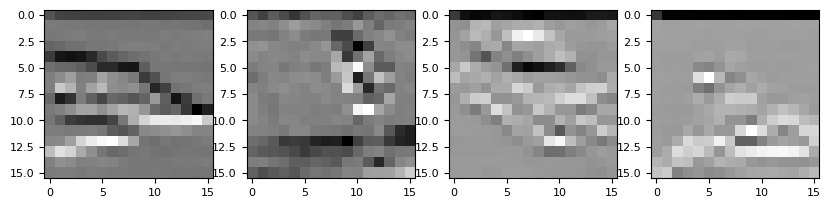

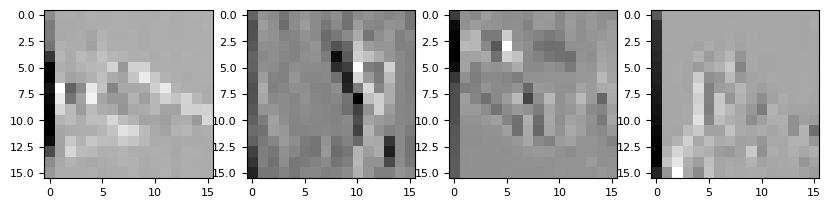

In [11]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,0]),1,4,10)
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

## Convolution over volums


In [12]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
                        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                        [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 3, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x.float())

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([32, 32]) 


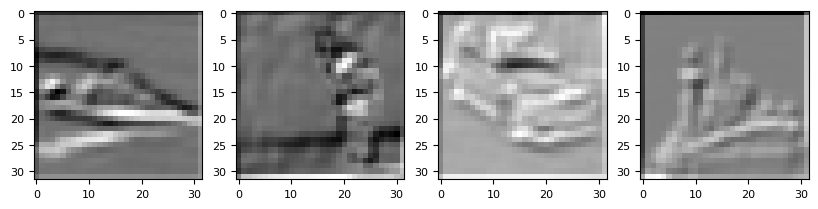

In [13]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
# print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

For each out_channel, we have different biases. each rely is diffewrent

ReLU(out_channel[0]+ b0)

ReLU(out_channel[1]+ b1)

ReLU(out_channel[2]+ b2)

# Max pooling

In [14]:
pool1 = nn.MaxPool2d(kernel_size=2,stride=1, padding=0)(result)

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([32, 32]) 


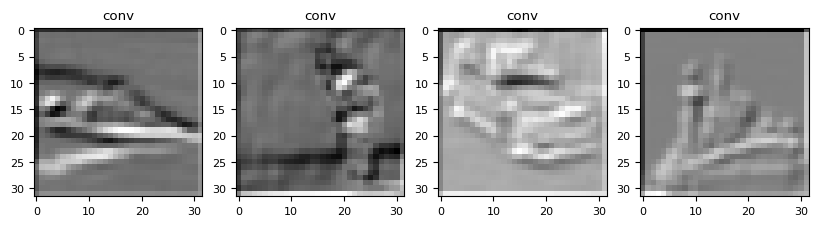

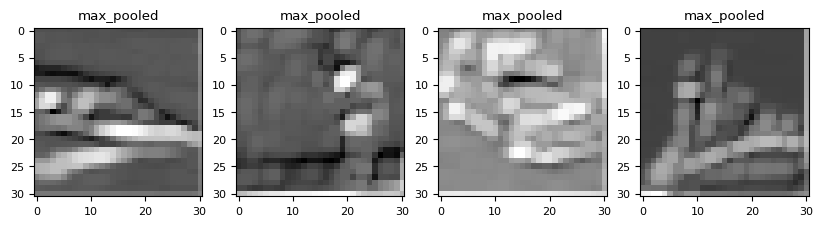

In [15]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10,titles=["conv"]*4)
print_iamges(list(pool1.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10,titles=["max_pooled"]*4)

# print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

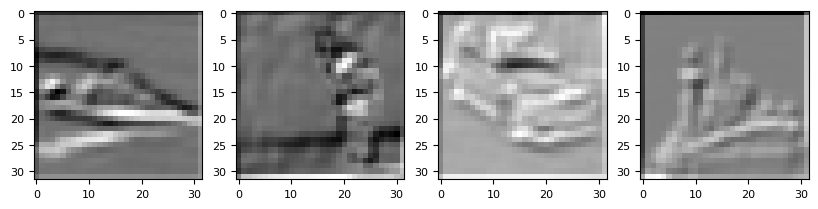

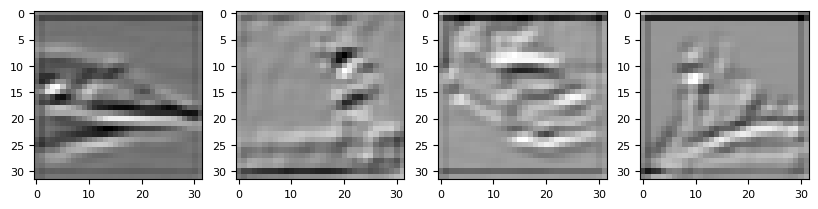

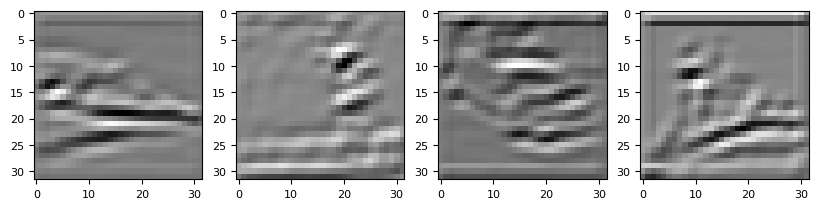

In [16]:
conv2 = conv(torch.broadcast_to(result,(4, 3, 32, 32)))
conv3 = conv(torch.broadcast_to(conv2,(4, 3, 32, 32)))

print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
print_iamges(list(conv2.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
print_iamges(list(conv3.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)


# CNN model

In [17]:
ts = transforms.Compose([
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

x = torch.randn(64, 3, 30, 30)
out = ts(x)
print(out.shape)
# > torch.Size([64, 3, 24, 24])

torch.Size([64, 3, 30, 30])


In [18]:
import numpy as np
train_x = train_data.data

ts = v2.Compose([transforms.ToTensor()])
ts(train_x[0]).shape


torch.Size([3, 32, 32])

In [27]:
from torch.utils import data
import torch
import numpy as np

class CIFAR10Dataset(data.Dataset):
  def __init__(self, dataset, mean, std):

    self.train_x = dataset.data
    self.train_y = dataset.targets
    self.len = len(dataset)

    self.ts = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ])
  def __len__(self):
    return self.len


  def __getitem__(self, idx):
    if isinstance(idx, slice):
      raise 0
    return self.ts(self.train_x[idx]),self.train_y[idx]


mean = train_data.data.mean()
std = train_data.data.std()
train_dataset = CIFAR10Dataset(train_data,mean,std)
test_dataset = CIFAR10Dataset(test_data,mean,std)

for x, y in train_dataset:
  break

In [ ]:
from torch.utils.data import DataLoader

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CIFAR10Classifier(torch.nn.Module):
  def __init__(self):
    super().__init__()
    dr = 0.2
    self.activation = nn.ReLU()
    self.layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6,kernel_size=3,stride = 1, padding=1,bias=True),
            nn.BatchNorm2d(6),
            self.activation,
            nn.Conv2d(in_channels= 6, out_channels = 10, kernel_size=3, stride=1, padding = 1),
            nn.BatchNorm2d(10),
            self.activation,
            nn.Flatten(start_dim=1),
            nn.Dropout(p=dr),
            nn.Linear(in_features=10*32*32, out_features=512, bias=True),
            nn.BatchNorm1d(512),
            self.activation,
            nn.Dropout(p=dr),
            nn.Linear(in_features=512, out_features=256, bias=True),
            nn.BatchNorm1d(256),
            self.activation,
            nn.Dropout(p=dr),
            nn.Linear(in_features=256, out_features=10, bias=True),
            nn.Softmax(dim=1),
    )


  def forward(self, input):
    output = self.layers(input)
    return output




model = CIFAR10Classifier().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss() # doesnt need one hot encoding
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss ,correct = 0,0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()


        # Backpropagation
        loss.backward() #computes dloss/dx for every parameter x which has requires_grad=True
        optimizer.step() # x.grad += dloss/dx. optimizer.step updates the value of x using the gradient x.grad .
        optimizer.zero_grad() #x.grad = 0 (useful in RNN)

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)

            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= len(dataloader)
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad(): # dont need grad
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")




epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(DataLoader(train_dataset,batch_size=128,shuffle=True,num_workers=2), model, loss_fn, optimizer)
    test(DataLoader(test_dataset,batch_size=128,shuffle=True,num_workers=2), model, loss_fn)
print("Done!")


Using cpu device
CIFAR10Classifier(
  (activation): ReLU()
  (layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=10240, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.2, inplace=False)
    (16): Linear(in_features=256, out_features=10, bias=Tr